# Bonus 

## Introduction

We wanted to simulation de diffusion experiment as we can see here : https://www.youtube.com/watch?v=_oLPBnhOCjM
(Why would you ask ? Because we can)

For a simple chemical reaction :
\begin{eqnarray}
U_{(g)} + V_{(g)} \rightarrow P_{(s)}
\end{eqnarray}

We get the following partial differential equations :

\begin{eqnarray}
\frac{\partial u}{\partial t} &=& D_u \cdot \nabla u - u*v\\
\frac{\partial v}{\partial t} &=& D_v \cdot \nabla v - u*v\\
\frac{\partial p}{\partial t} &=& u*v
\end{eqnarray}

What about the boundary conditions ? We want to have sources of both particle on the opposite sides of the tube so we would have : $u(0,y) = 1$ and $v(L_x, y) = 1$. Everywhere else, we want the gaz to stay inside the tube so we use Neumann conditions on the other limits : $\frac{\partial u}{\partial x_i} = 0$ 

All of those equation are easily discretize as seen before to give the following algorithm.

An objection one could raise is that we should use laplacian in cylindrical coordinate. The problem is that such a laplacian has a term in $\frac{1}{r}$. This gives convergence problems so (as the problem is mostly 1Dimensional in fact) we decide to stick with the usual cartesian laplacian.

In [1]:
#impoting librairies
import numpy
from matplotlib import pyplot
from math import pi, sqrt, log
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def evolve(u, v, p, nt, dt, dx, dy, Du, Dv, aBC, bBC):
    """
    This function take some parameters and run the simulation explained above.
    Parameters :
    ------------
        u : Float 2D-array
            Store the initial condition on u (is modified during the simulation)
        v : Float 2D-array
            Store the initial condition on u (is modified during the simulation)
        p : Float 2D-array
            Store the initial condition on u (is modified during the simulation)
        nt : int
                number of steps the simulation has to run
        dt : Float
                time-step
        dx : Float
                X-step
        dy : Float
                Y-step
        Du : Float
                Diffusion speed of u
        Dv : Float
                Diffusion speed of v
        aBC : Float
                Boundary condition of a
        bBC : Float
                Boundary condition of b
    Return :
    --------
        v : 2D-array
            the 2D-array entered in v after the simulation
    """
    
    
    for n in range(nt):
        
        #runing the equation
        un = u.copy()
        vn = v.copy()
        pn = p.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + Du*dt*(1/dy/dy* (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1]) + 1/dx/dx* (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2])) - dt*(un[1:-1,1:-1]*vn[1:-1,1:-1]) #nonlinear + feed/kill part
        v[1:-1,1:-1] = vn[1:-1,1:-1] + Dv*dt*(1/dy/dy* (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1]) + 1/dx/dx* (vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2])) - dt*(un[1:-1,1:-1]*vn[1:-1,1:-1])
        p[1:-1,1:-1] = pn[1:-1,1:-1] + dt*un[1:-1,1:-1]*vn[1:-1,1:-1]
        
        # Enforce Dirichlet BC's
        u[:,0] = aBC
        v[:,-1] = bBC
        
        # Enforce Neumann BC's
        u[0,:] = u[1,:]
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:, -2]
        
        v[0,:] = v[1,:]
        v[:,0] = v[:,1]
        v[-1,:] = v[-2,:]
        
        p[0,:] = p[1, :]
        p[-1,:] = p[-2,:]
        p[:,0] = p[:,1]
        p[:,-1] = p[:,-2]
    return v

def printsolution(Lx, nx, Ly, ny, U, V, P):    
    """
    This function print the U, V and P give as parameter with pyplot
    
    Parameters:
    -----------
    Lx : float
        lenght in x
    Ly : float
        lenght in y
    nx : int
        number of step in x
    ny : int 
        number of step in y
    U : 2D float array
        first array to print
    V : 2D float array
        second array to print
    P : 2D float array
        third array to print
    """
    #printing solution
    x = numpy.linspace(0,Lx,nx)
    y = numpy.linspace(0,Ly,ny)
    pyplot.figure(figsize=(8,5))
    pyplot.contourf(x, y,U,200,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar();
    pyplot.title('Concentration in U')
    pyplot.figure(figsize=(8,5))
    pyplot.contourf(x, y,V,200,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar();
    pyplot.title('Concentration in V')
    pyplot.figure(figsize=(8,5))
    pyplot.contourf(x, y,P,200,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar();
    pyplot.title('Concentration in P')
    
def findMaxPos(U):
    i=0
    maxX=numpy.amax(U)
    while(U[i]!=maxX):
        i+=1
    return i
        

In [3]:
#Scalar initial conditions :

#number of space steps
nx = 100
ny = 5
#space lenghts
Lx = 1
Ly = .05
#lenghts of space step
dx = Lx/(nx-1)
dy = Ly/(ny-1)

# Boundary conditions
aBC = 1
bBC = 1

# Diffusion speed and time parameters

T = 2000
Du = 0.00005
Dv = 0.00005
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)
#Checking number of step is doable
print(nt)

7840


In [4]:
#Array like initial conditions
U = numpy.zeros((ny, nx))
V = numpy.zeros((ny, nx))
P = numpy.zeros((ny, nx))

In [5]:
result = evolve(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)

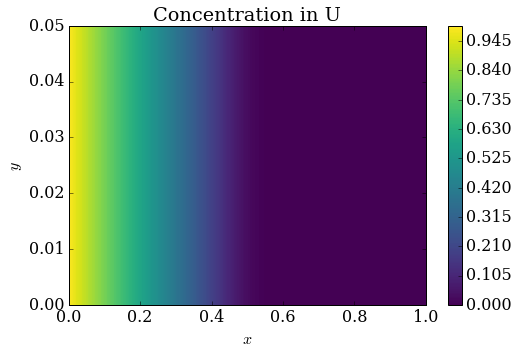

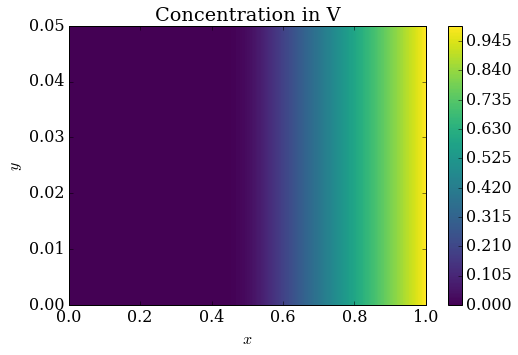

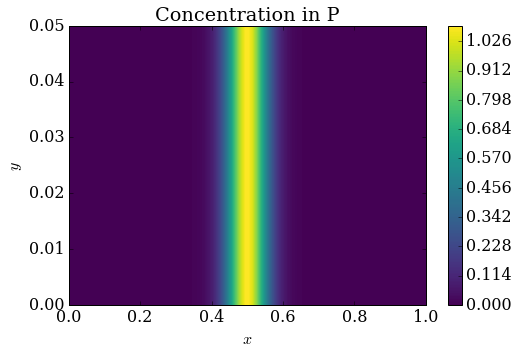

In [6]:
printsolution(Lx, nx, Ly, ny, U, V, P)

As we can see, we obtain the expected behavior for that kind of reaction. Let's experiment now ! (Because, boring comportement is boring)

## Discussing initial condition

### Boundary condition

First lets change the concentrations at the boundaries to understand how the position of the deposit in p change.

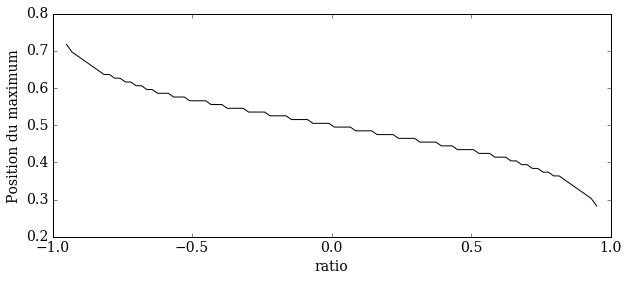

In [7]:
# Boundary conditions
aBC = 1
bBC = 0.1

# Diffusion speed and time parameters
T = 1000
Du = 0.00005
Dv = 0.00005
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)

#Array like initial conditions
ratio=numpy.linspace(-0.95, 0.95, 100)
maxP = numpy.empty_like(ratio)

for i in range (0, ratio.size) :
    U = numpy.zeros((ny, nx))
    V = numpy.zeros((ny, nx))
    P = numpy.zeros((ny, nx))
    # Boundary conditions
    aBC = 1-ratio[i]
    bBC = 1+ratio[i]
    evolve(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)
    maxP[i] =findMaxPos(P[0,:])*dx

pyplot.figure(figsize=(10,4))   #set plot size
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('ratio', fontsize=14) #x label
pyplot.ylabel('Position du maximum', fontsize=14) #y label
pyplot.plot(ratio,maxP, 'k-');


We have quite a regular linear comportement when the maximum is around 0.5. This could have been expected, indeed, at this point, the boundary conditions don't influence the center of the system, when we approche the boundary, we can see it is diverge slightly because of the dirichlet boundary conditions that forbidd the gaz to diffuse any further.

### Diffusion ratio :

In [8]:
#Array like initial conditions
ratio=numpy.linspace(-0.00049, 0.00049, 30)
maxP = numpy.empty_like(ratio)

for i in range (0, ratio.size) :
    U = numpy.zeros((ny, nx))
    V = numpy.zeros((ny, nx))
    P = numpy.zeros((ny, nx))
    # Boundary conditions
    aBC = 1
    bBC = 1
    # Diffusion speed and time parameters
    T = 500
    Du = 0.0005-ratio[i]
    Dv = 0.0005+ratio[i]
    dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
    nt = int(T/dt)
    
    evolve(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)
    maxP[i] =findMaxPos(P[0,:])*dx

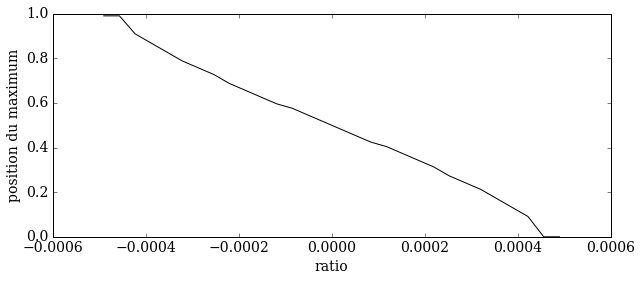

In [9]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('ratio', fontsize=14) #x label
pyplot.ylabel('position du maximum', fontsize=14) #y label
pyplot.plot(ratio, maxP, 'k-')

We have a linear comportement until we reach the boundaries for the same reason's as above.

## Other :

Here's another very interesting thing we can notice. If the reaction is strong enough it plays the role of a wall for the reactants, even for long periods of time.
We will now compare the results when the reaction is strong, weak and we will even consider the inverse reaction for the product.

In [10]:
def evolve2(u, v, p, nt, dt, dx, dy, Du, Dv, aBC, bBC):
    """
    This function take some parameters and run the simulation explained above.
    Parameters :
    ------------
        u : Float 2D-array
            Store the initial condition on u (is modified during the simulation)
        v : Float 2D-array
            Store the initial condition on u (is modified during the simulation)
        p : Float 2D-array
            Store the initial condition on u (is modified during the simulation)
        nt : int
                number of steps the simulation has to run
        dt : Float
                time-step
        dx : Float
                X-step
        dy : Float
                Y-step
        Du : Float
                Diffusion speed of u
        Dv : Float
                Diffusion speed of v
        aBC : Float
                Boundary condition of a
        bBC : Float
                Boundary condition of b
    Return :
    --------
        v : 2D-array
            the 2D-array entered in v after the simulation
    """
    
    
    for n in range(nt):
        
        #runing the equation
        un = u.copy()
        vn = v.copy()
        pn = p.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + Du*dt*(1/dy/dy* (un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1]) + 1/dx/dx* (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2])) - dt*(un[1:-1,1:-1]*vn[1:-1,1:-1])*kr + dt*(pn[1:-1,1:-1])*kp 
        v[1:-1,1:-1] = vn[1:-1,1:-1] + Dv*dt*(1/dy/dy* (vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1]) + 1/dx/dx* (vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2])) - dt*(un[1:-1,1:-1]*vn[1:-1,1:-1])*kr + dt*(pn[1:-1,1:-1])*kp 
        p[1:-1,1:-1] = pn[1:-1,1:-1] + Dp*dt*(1/dy/dy* (pn[2:,1:-1] - 2*pn[1:-1,1:-1] + pn[:-2,1:-1]) + 1/dx/dx* (pn[1:-1,2:] - 2*pn[1:-1,1:-1] + pn[1:-1,:-2])) + dt*(un[1:-1,1:-1]*vn[1:-1,1:-1])*kr - dt*(pn[1:-1,1:-1])*kp 
                 #we add the diffusion term for the product
                 #and the inverse reaction with some constants for the direct reaction(kr) and for the inverse one(kp).
                 #This way we will be able to control the force of the reaction. A smaller constant means the reaction is weaker.
        # Enforce Dirichlet BC's
        u[:,0] = aBC
        v[:,-1] = bBC
        
        # Enforce Neumann BC's
        u[0,:] = u[1,:]
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:, -2]
        
        v[0,:] = v[1,:]
        v[:,0] = v[:,1]
        v[-1,:] = v[-2,:]
        
        p[0,:] = p[1, :]
        p[-1,:] = p[-2,:]
        p[:,0] = p[:,1]
        p[:,-1] = p[:,-2]
    return v

In [11]:
#Scalar initial conditions :

#number of space steps
nx = 100
ny = 5
#space lenghts
Lx = 1
Ly = .05
#lenghts of space step
dx = Lx/(nx-1)
dy = Ly/(ny-1)

# Boundary conditions
aBC = 1
bBC = 1

# Diffusion speed and time parameters
"Note that we use T=10000"
T = 10000
Du = 0.00005
Dv = 0.00005
Dp = 0.00005
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)
#Array like initial conditions
U = numpy.zeros((ny, nx))
V = numpy.zeros((ny, nx))
P = numpy.zeros((ny, nx))
#Checking number of step is doable
print(nt)

39203


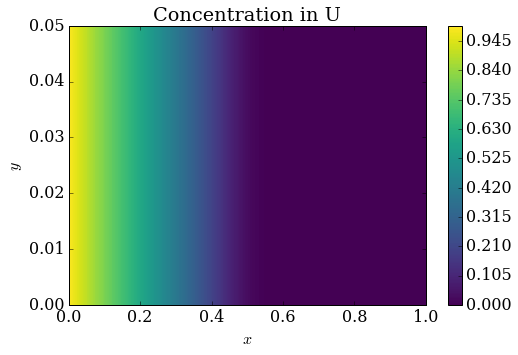

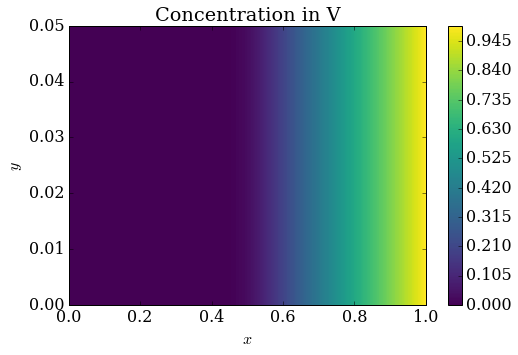

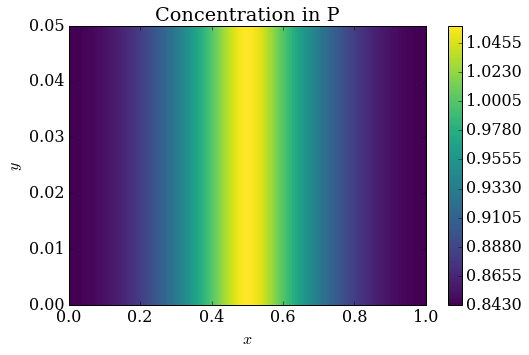

In [12]:
#Strong direct reaction, no inverse reaction, long time#
kr=1.
kp=0.
T = 10000
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)
result = evolve2(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)
printsolution(Lx, nx, Ly, ny, U, V, P)

This situation depicts the reaction of two gases strongly reacting to give a stable gazeous product.
Even after a very long time, we observe a "wall" that's prevent reactants from going further.
The gazeous product diffuses normally.

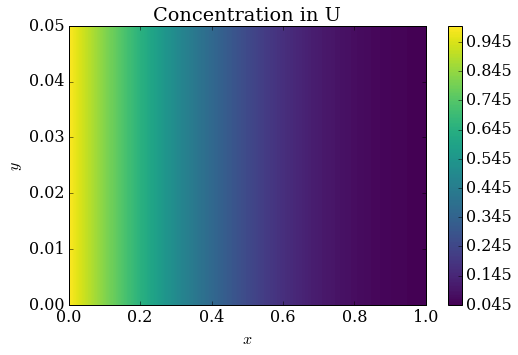

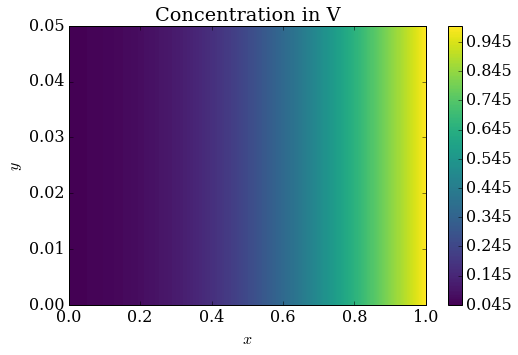

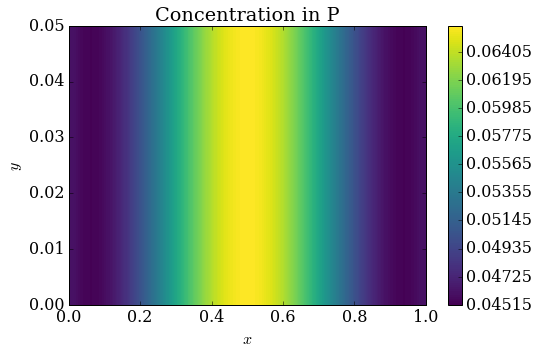

In [13]:
#Strong direct reaction, strong inverse reaction, medium time#
kr=1.
kp=1.
T = 2500
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)

#Array like initial conditions
U = numpy.zeros((ny, nx))
V = numpy.zeros((ny, nx))
P = numpy.zeros((ny, nx))

result = evolve2(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)
printsolution(Lx, nx, Ly, ny, U, V, P)

This situation depicts two gases strongly reacting to give an unstable gazeous product.
The inverse reaction greatly helps the diffusion of the reactants while maintaining a low concentration. It is important to note that this situation is not equivalent to the diffusion of two inert gazes.

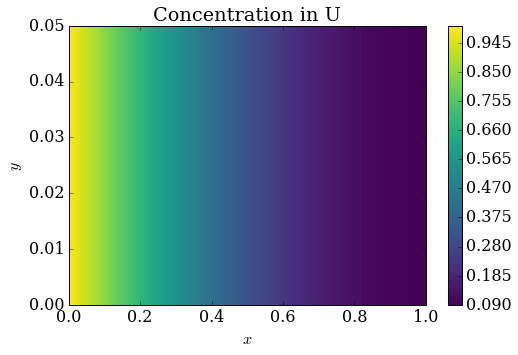

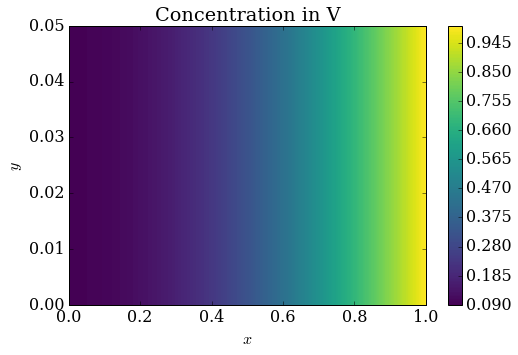

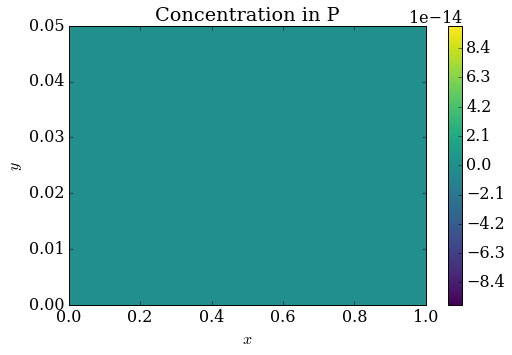

In [14]:
#Inert gazes#
kr=0.
kp=0.
T = 2500
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)

#Array like initial conditions
U = numpy.zeros((ny, nx))
V = numpy.zeros((ny, nx))
P = numpy.zeros((ny, nx))

result = evolve2(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)
printsolution(Lx, nx, Ly, ny, U, V, P)

Almost twice the reactants made it to the opposite border in this simulation than in the previous one. The gazeous product acts as a slowing agent for the diffusion. A more unstable product should diminish this effect.

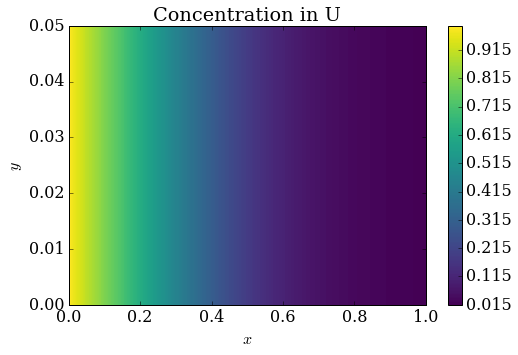

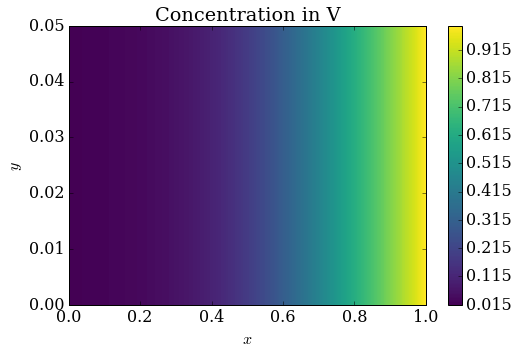

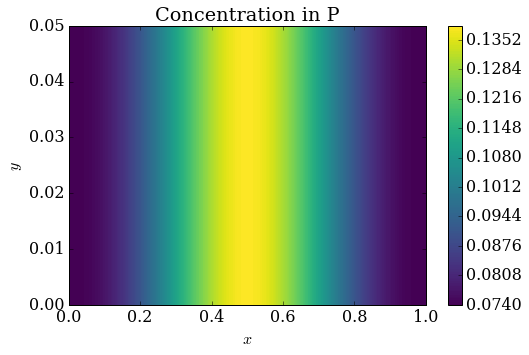

In [15]:
#Strong direct reaction, very strong inverse reaction#
kr=1.
kp=0.25
T = 2500
dt = .5 * min(dx, dy)**2 / (4*max(Du,Dv))
nt = int(T/dt)

#Array like initial conditions
U = numpy.zeros((ny, nx))
V = numpy.zeros((ny, nx))
P = numpy.zeros((ny, nx))

result = evolve2(U, V, P, nt, dt, dx, dy, Du, Dv, aBC, bBC)
printsolution(Lx, nx, Ly, ny, U, V, P)

As suspected, the increase in the inverse reaction's strenght has diminished the slowing effect. We can use the r=kp/kr ratio to study it's effect on the amount of reactants making it to the other end of the tube. Testing different ratios gives us approximative values of the difference in concentration of reactants at the end of the other tube at ratio = r and ratio = infinity.


In [16]:
#r  = react(ratio=infinity) - react(ratio=r) 
#4    - 0.02
#2    - 0.03
#1    - 0.045
#0.5  - 0.06
#0.25 - 0.075
#0.125- 0.08

It seems that at each time we double this ratio, we substract 0.015 to this difference. We can express this behaviour in this formula:
\begin{eqnarray}
\Delta C = - \frac{log(R)}{20} + 0.045
\end{eqnarray}

Of course, this empirical law we deduced from the simulations isn't very precise and doesn't hold when the ration goes to 0 or infinity but looks good for "r" between 0.25 and 2. Hovewer, many chemical reactions have an equilibrium constant close to 1, so even if this deduction won't make us win a Nobel Prize, it could be an interesting path to follow.

# Conclusion

In this notebook, we simulated the behavious of two gases reacting with themselves. By playing with the initial conditions, we could find some interesting properties like the slowing role of the producted gas for the diffusion of the gases.